<a href="https://colab.research.google.com/github/ManasaCherukupally1/Projects/blob/main/House_Price_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction using Regression Techniques**

This the machine learning project to predict house price based on the different features provided. The sample dataset for this project is taken from Kaggle https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data. Since the problem is related to price prediction different machine learning regression models have been used and the best performance was achieved through XGBoot Regressor with R-Squared score as 3.9.


In [144]:
import pandas as pd
import numpy as np

#load the training dataset
df=pd.read_csv("/content/train.csv")
print(df.head(10))
print(df.shape)


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [145]:
#Gather the statistical information
print(df.describe(include='all'))
print(df.info())

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

Data Cleaning

In [146]:
# Identify missing values
missing_values = df.isnull().sum()

# print columns with missing values
print("Columns with missing values")
print(missing_values[missing_values > 0])

threshold = 1000

#remove columns with missing values greater than threshold
columns_to_rm= missing_values[missing_values > threshold].index

# Remove the identified columns
df_filtered = df.drop(columns=columns_to_rm)

print("Columns removed:")
print(columns_to_rm)

#Remove duplicates
df_filtered.drop_duplicates(inplace=True)
print(df_filtered.shape)

Columns with missing values
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Columns removed:
Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')
(1460, 77)


Finding the top correlated columns with target column


<ipython-input-147-e3a1d39d1a54>:7: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df_filtered.corrwith(df_filtered[target_column])


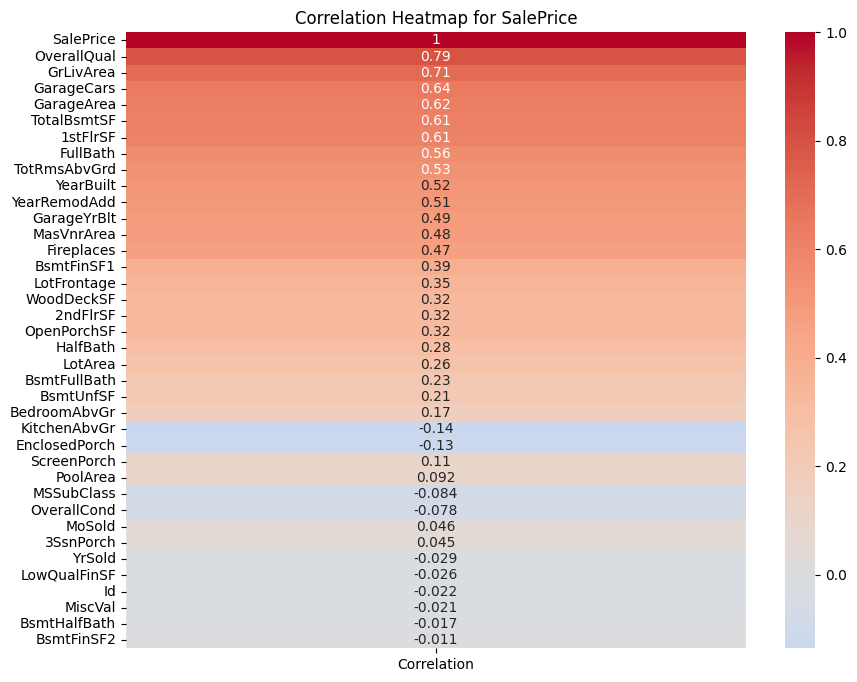

Top 10 Highly Correlated Columns with SalePrice
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64
      SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073        

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'SalePrice'

# Calculate the correlation with the target variable
correlation_with_target = df_filtered.corrwith(df_filtered[target_column])
correlation_df = pd.DataFrame(correlation_with_target, columns=['Correlation'])

# Sort the dataframe
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df[['Correlation']], annot=True, cmap="coolwarm", center=0)
plt.title(f'Correlation Heatmap for {target_column}')
plt.show()


top_correlations = correlation_with_target.abs().nlargest(11)
top_correlations = top_correlations.drop(target_column)

# Print the top columns
print("Top 10 Highly Correlated Columns with", target_column)
print(top_correlations)

# Create a list
selected_columns = [target_column] + top_correlations.index.tolist()

# Create a new DataFrame
selected_data = df_filtered[selected_columns]
print(selected_data)







In [148]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify object data type columns
columns_to_encode = df_filtered.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column separately
for col in columns_to_encode:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
df_filtered.dropna(inplace=True)

print(df_filtered.head())

   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...              0          0   
1            3          0          2  ...              0          0   
2            3          0          4  ...              0          0   
3            3          0          0  ...            272          0   
4            3          0          2  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8         

In [149]:
from sklearn.model_selection import train_test_split

target_variable='SalePrice'
X = df_filtered.drop(target_variable, axis=1)
y = df_filtered[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Other way to find highly correlated variable (using Random forest model)

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Create and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importance = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df['Feature'])
features_list_total= feature_importance_df['Feature'].tolist()
features_list=features_list_total[:10]
new_df=df_filtered[features_list]
new_selected_data=new_df.join(df_filtered['SalePrice'], how='left')
print(new_selected_data.info)


0             Id
61    GarageArea
42      1stFlrSF
45     GrLivArea
4        LotArea
         ...    
21      RoofMatl
13    Condition2
5         Street
70      PoolArea
8      Utilities
Name: Feature, Length: 76, dtype: object
<bound method DataFrame.info of         Id  GarageArea  1stFlrSF  GrLivArea  LotArea  BsmtUnfSF  TotalBsmtSF  \
0        1         548       856       1710     8450        150          856   
1        2         460      1262       1262     9600        284         1262   
2        3         608       920       1786    11250        434          920   
3        4         642       961       1717     9550        540          756   
4        5         836      1145       2198    14260        490         1145   
...    ...         ...       ...        ...      ...        ...          ...   
1455  1456         460       953       1647     7917        953          953   
1456  1457         500      2073       2073    13175        589         1542   
1457  1458         2

Checking for Variance Inflation Factor

In [151]:
import statsmodels.api as sm

# Separate the target variable and predictors
y = new_selected_data['SalePrice']
X = new_selected_data.drop(['SalePrice'], axis=1)

# Add a constant term to the predictor matrix (required for statsmodels)
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]

# Display the VIF values
print(vif)

       Variable       VIF
0         const  0.999894
1            Id  0.003193
2    GarageArea  0.544080
3      1stFlrSF  0.749326
4     GrLivArea  0.397237
5       LotArea  0.231581
6     BsmtUnfSF  0.187149
7   TotalBsmtSF  0.738718
8   LotFrontage  0.328088
9        MoSold  0.006344
10  GarageYrBlt  0.396011


Box plot

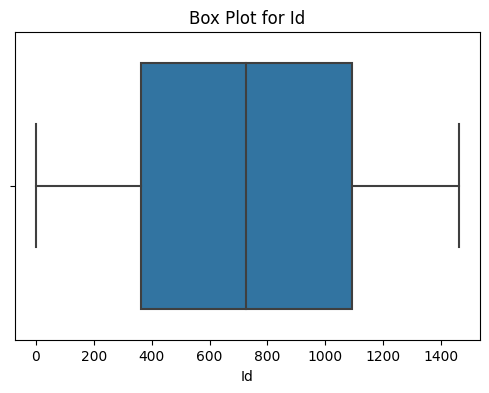

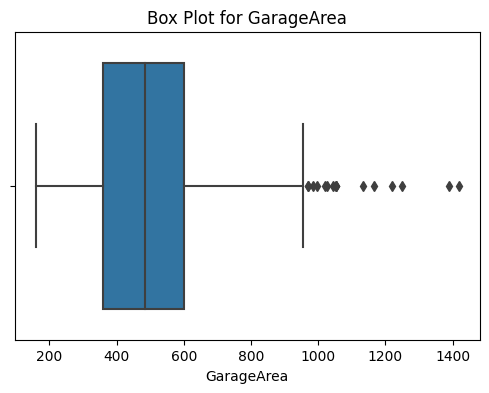

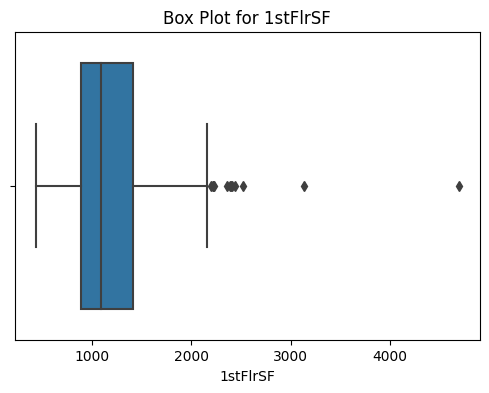

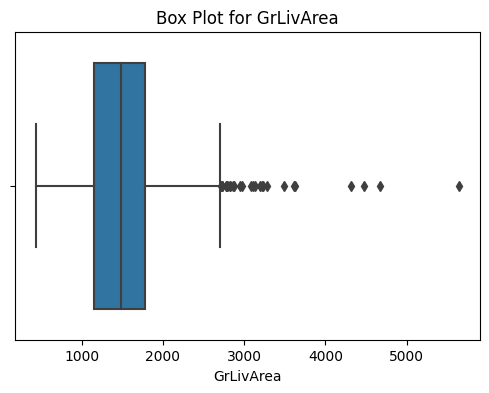

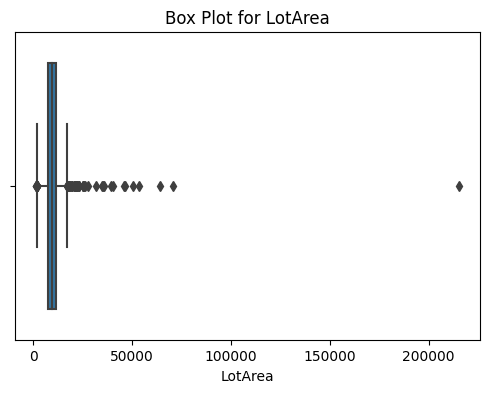

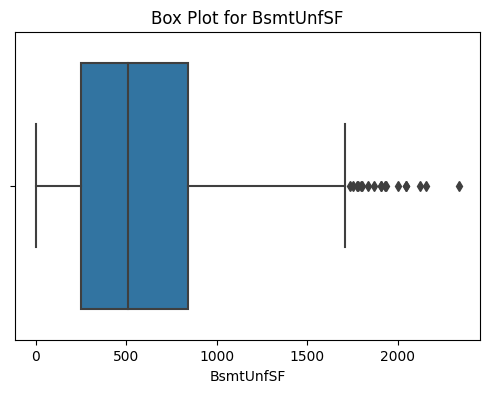

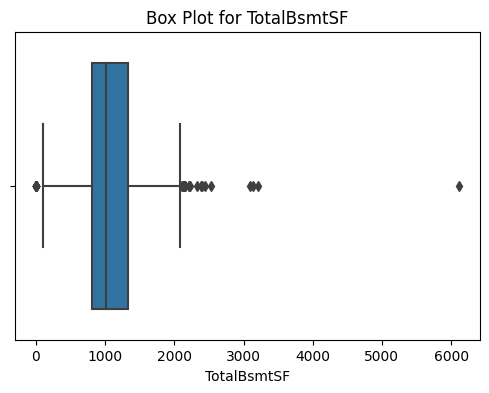

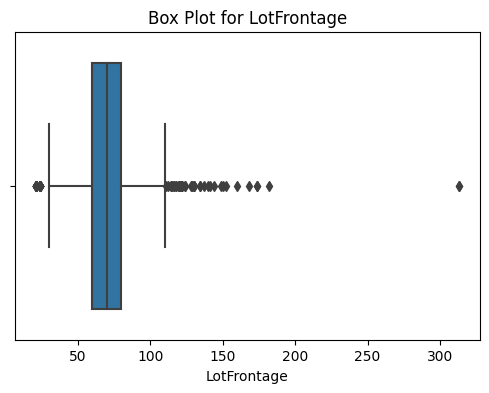

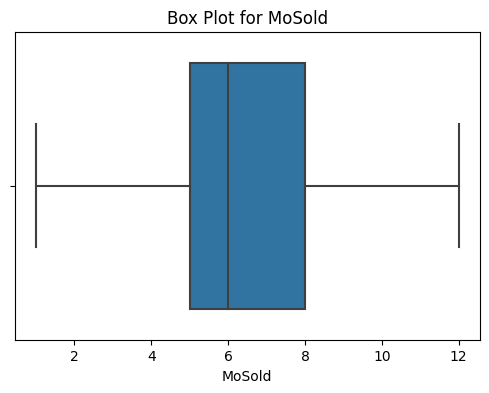

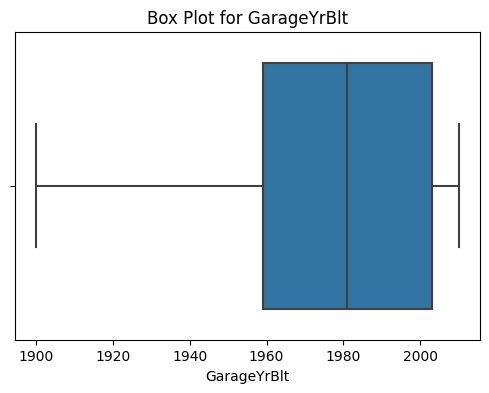

In [152]:


for column in features_list:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.boxplot(x=new_selected_data[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()

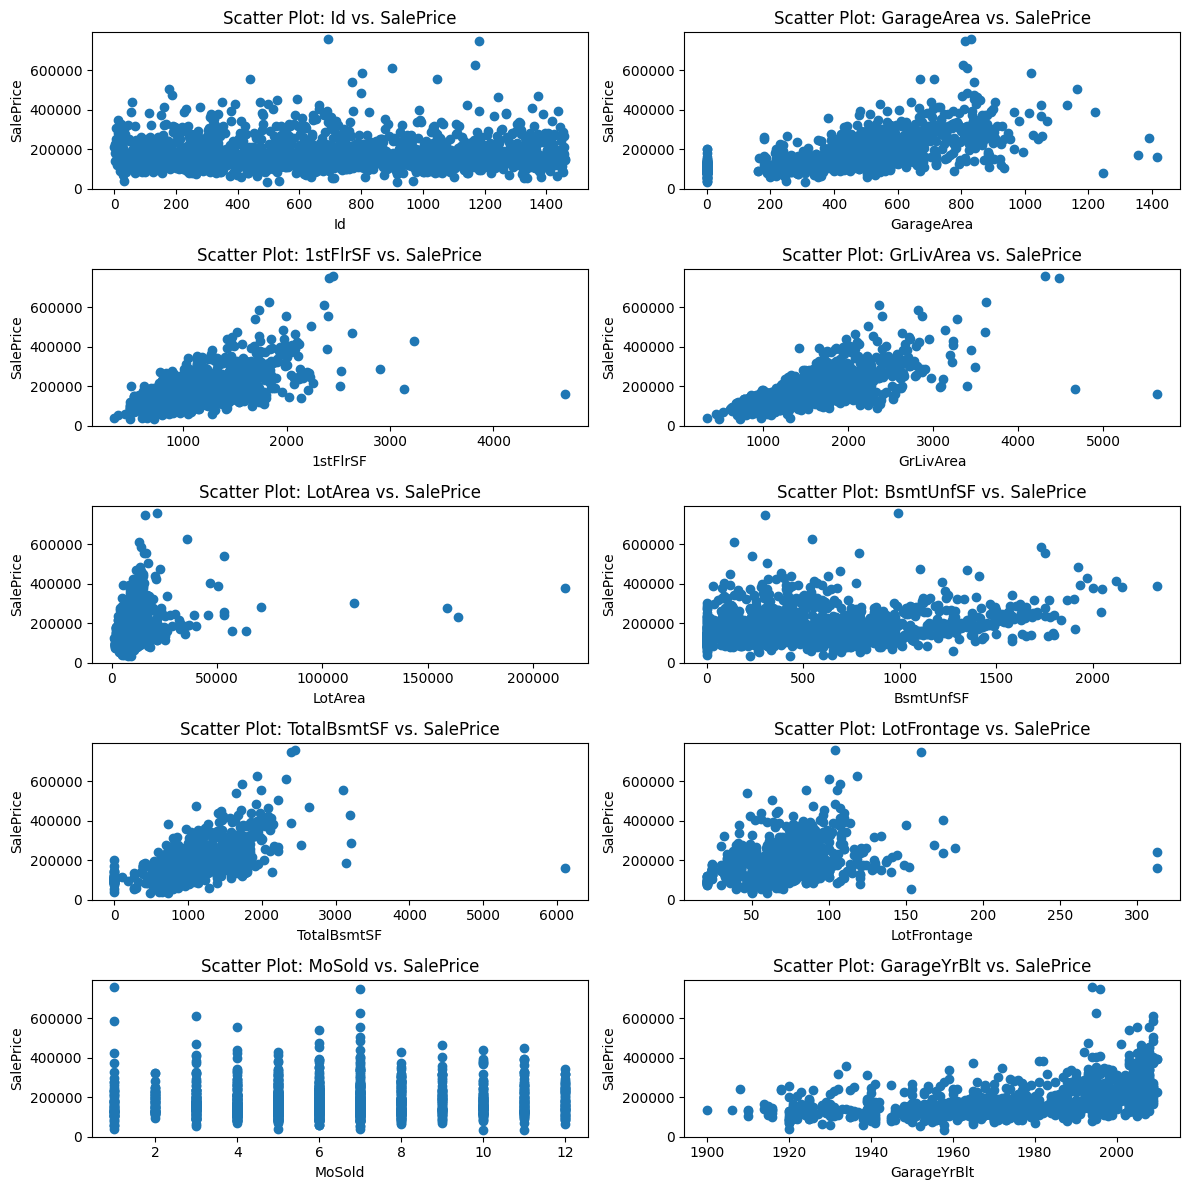

In [153]:
# Select the target column
target_column = 'SalePrice'

# Create subplots for each feature with respect to the target
num_plots = len(features_list)
num_rows = num_plots // 2 if num_plots % 2 == 0 else num_plots // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_list):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    ax.scatter(df[feature], df[target_column])
    ax.set_title(f'Scatter Plot: {feature} vs. {target_column}')
    ax.set_xlabel(feature)
    ax.set_ylabel(target_column)

# Remove any empty subplots if the number of plots is odd
if num_plots % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


Removing outliers in selected columns

In [154]:
def remove_outliers_iqr(data, column):
    # Calculate the IQR (Interquartile Range) for the specified column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to remove outliers
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data_no_outliers

for column in features_list[:10]:
    new_selected_data = remove_outliers_iqr(new_selected_data, column)
print(new_selected_data.head())

   Id  GarageArea  1stFlrSF  GrLivArea  LotArea  BsmtUnfSF  TotalBsmtSF  \
0   1         548       856       1710     8450        150          856   
1   2         460      1262       1262     9600        284         1262   
2   3         608       920       1786    11250        434          920   
3   4         642       961       1717     9550        540          756   
4   5         836      1145       2198    14260        490         1145   

   LotFrontage  MoSold  GarageYrBlt  SalePrice  
0         65.0       2       2003.0     208500  
1         80.0       5       1976.0     181500  
2         68.0       9       2001.0     223500  
3         60.0       2       1998.0     140000  
4         84.0      12       2000.0     250000  


Since there is Variance Inflation Factor, convert data using Principle component Analysis.

In [155]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

target_variable='SalePrice'
X = new_selected_data.drop(target_variable, axis=1)
y = new_selected_data[target_variable]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance_ratio)



Explained Variance Ratios: [0.90942226 0.03299517]


Splitting into training and testing

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Linear Regression model

In [157]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

print("Mean Squared Error:", mse)
print("R-squared:", r2_linear)

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

# Perform k-fold cross-validation (e.g., k=5) and compute RMSE
k = 5
r2_scores = cross_val_score(model, X_pca, y, cv=k, scoring='r2')

# Calculate and print the mean R2 across all folds
mean_r2 = np.mean(r2_scores)
print("Mean R2:", mean_r2)


RMSE: 43223.95770816686
Mean Squared Error: 1868310519.9573975
R-squared: 0.4521870900494095
Mean R2: 0.4602843702336273


Ridge Regression

In [158]:
from sklearn.linear_model import Ridge
# Create and Train the Ridge Regression Model with L2 Regularization
ridge_reg = Ridge(alpha=1.0)  # The alpha parameter controls the strength of regularization
ridge_reg.fit(X_train, y_train)

# Make Predictions
y_pred = ridge_reg.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2_ridge:.2f}")

# Perform k-fold cross-validation (e.g., k=5) and compute RMSE
k = 5
r2_scores = cross_val_score(ridge_reg, X_pca, y, cv=k, scoring='r2')

# Calculate and print the mean R2 across all folds
mean_r2 = np.mean(r2_scores)
print("Mean R2:", mean_r2)


RMSE: 43223.95769297087
Mean Squared Error: 1868310518.64
R-squared (R2): 0.45
Mean R2: 0.46028437026014757


Random Forest Regression model

In [159]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_random = r2_score(y_test, y_pred)
# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2_random:.2f}")

# Perform k-fold cross-validation (e.g., k=5) and compute RMSE
k = 5
r2_scores = cross_val_score(rf_regressor, X_pca, y, cv=k, scoring='r2')

# Calculate and print the mean R2 across all folds
mean_r2 = np.mean(r2_scores)
print("Mean R2:", mean_r2)

RMSE: 44712.20547104048
Mean Squared Error: 1999181318.08
R-squared (R2): 0.41
Mean R2: 0.40872614563281606


XGBoost Regression model

In [160]:
from xgboost import XGBRegressor

xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)
y_pred=xgb_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_XGboost = r2_score(y_test, y_pred)
# Calculate the RMSE
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2_XGboost:.2f}")

# Perform k-fold cross-validation (e.g., k=5) and compute RMSE
k = 5
r2_scores = cross_val_score(xgb_regressor, X_pca, y, cv=k, scoring='r2')

# Calculate and print the mean R2 across all folds
mean_r2 = np.mean(r2_scores)
print("Mean R2:", mean_r2)

RMSE: 45590.502605572125
Mean Squared Error: 2078493927.83
R-squared (R2): 0.39
Mean R2: 0.38223840135283843


Bar plot with RMSE results from all models

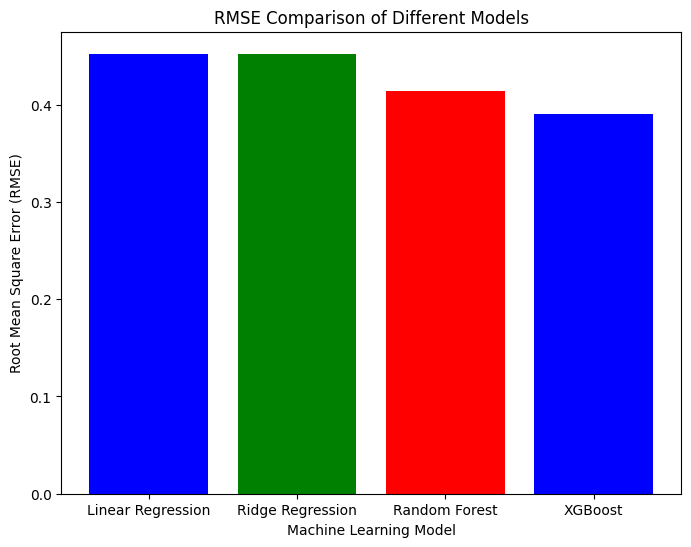

In [161]:
import matplotlib.pyplot as plt

# Model names and their corresponding RMSE values
models = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost']
rmse_values = [r2_linear,r2_ridge,r2_random,r2_XGboost]  # Replace these values with your actual RMSE scores

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Machine Learning Model')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.title('RMSE Comparison of Different Models')

# Display the bar graph
plt.show()


Best results are obtained from Neural Networks model.
Testing model with test dataset